# Free GPU memory

In [1]:
import tensorflow as tf 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Libraries

In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
from keras.preprocessing.image import ImageDataGenerator

# Directory

In [3]:
TRAIN_PATH = r'F:\Leuk study re-designed\ALLIDB-2\Low imbalance\Train - 1 to 10 ratio\all'

BATCH_SIZE=4

# Data loader

In [4]:
import skimage
from skimage.io import imread, imshow
data = []
i = 0
CATEGORIES = r'all'
plt.figure(figsize=(15, 15))

list_img = os.listdir(TRAIN_PATH)

for img in list_img:
    img_path = os.path.join(TRAIN_PATH, img)
    print(img_path)


    arr = imread(img_path)

    data.append(arr)

F:\Leuk study re-designed\ALLIDB-2\Low imbalance\Train - 1 to 10 ratio\all\Im030_1.tif
F:\Leuk study re-designed\ALLIDB-2\Low imbalance\Train - 1 to 10 ratio\all\Im036_1.tif
F:\Leuk study re-designed\ALLIDB-2\Low imbalance\Train - 1 to 10 ratio\all\Im044_1.tif
F:\Leuk study re-designed\ALLIDB-2\Low imbalance\Train - 1 to 10 ratio\all\Im060_1.tif
F:\Leuk study re-designed\ALLIDB-2\Low imbalance\Train - 1 to 10 ratio\all\Im074_1.tif
F:\Leuk study re-designed\ALLIDB-2\Low imbalance\Train - 1 to 10 ratio\all\Im093_1.tif
F:\Leuk study re-designed\ALLIDB-2\Low imbalance\Train - 1 to 10 ratio\all\Im098_1.tif
F:\Leuk study re-designed\ALLIDB-2\Low imbalance\Train - 1 to 10 ratio\all\Im113_1.tif
F:\Leuk study re-designed\ALLIDB-2\Low imbalance\Train - 1 to 10 ratio\all\Im120_1.tif
F:\Leuk study re-designed\ALLIDB-2\Low imbalance\Train - 1 to 10 ratio\all\Im123_1.tif


<Figure size 1080x1080 with 0 Axes>

# Create train data

In [6]:
random.shuffle(data)

x_train = []


for features in data:
    x_train.append(features)
    

    
x_train = np.array(x_train)

print(x_train.shape)
print(x_train.dtype)

r=c=452
import skimage
from skimage.transform import resize
new_x_train = np.zeros((x_train.shape[0], r, c, 3), dtype=np.uint8)
print(new_x_train.shape)
i=0
for img in x_train:
    image = resize(img,(r, c, 3), preserve_range=True)
    new_x_train[i] = image
    i+=1


new_x_train = new_x_train/255.0
new_x_train = new_x_train.astype('float32')
print(new_x_train.shape)
print(new_x_train.dtype)




(10, 257, 257, 3)
uint8
(10, 452, 452, 3)
(10, 452, 452, 3)
float32


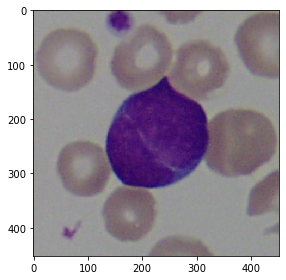

In [7]:
import skimage
from skimage.io import imread, imshow
imshow(new_x_train[0])

# Autoencoder

In [8]:

import keras
from keras import layers

input_img = keras.Input(shape=(452, 452, 3))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='Adagrad', loss='binary_crossentropy') #metrics=['accuracy']
autoencoder.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 452, 452, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 452, 452, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 226, 226, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 226, 226, 8)       1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 113, 113, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 113, 113, 8)       584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 57, 57, 8)        

# Train

In [12]:
#import keras
import tensorflow.keras as keras
#from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('train_norm_autoencoder_200.h5', monitor='loss', save_best_only=True, mode='min'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.0, verbose=1, patience=5, mode='max')]


In [15]:


autoencoder.fit(new_x_train, new_x_train,
                epochs=500,
                batch_size=4,
                shuffle=True,
                callbacks = callbacks)



Epoch 1/500
3/3 [==============================] - 1s 174ms/step - loss: 0.6926
Epoch 2/500
3/3 [==============================] - 0s 46ms/step - loss: 0.6926
Epoch 3/500
3/3 [==============================] - 0s 70ms/step - loss: 0.6926
Epoch 4/500
3/3 [==============================] - 0s 45ms/step - loss: 0.6926
Epoch 5/500
3/3 [==============================] - 0s 59ms/step - loss: 0.6926
Epoch 6/500
3/3 [==============================] - ETA: 0s - loss: 0.6925
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0.
3/3 [==============================] - 0s 59ms/step - loss: 0.6925
Epoch 7/500
3/3 [==============================] - 0s 42ms/step - loss: 0.6925
Epoch 8/500
3/3 [==============================] - 0s 50ms/step - loss: 0.6925
Epoch 9/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 10/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 11/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6925
Epoc

Epoch 102/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 103/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 104/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 105/500
3/3 [==============================] - 0s 64ms/step - loss: 0.6925
Epoch 106/500
3/3 [==============================] - 0s 24ms/step - loss: 0.6925
Epoch 107/500
3/3 [==============================] - 0s 25ms/step - loss: 0.6925
Epoch 108/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6925
Epoch 109/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 110/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 111/500
3/3 [==============================] - 0s 26ms/step - loss: 0.6925
Epoch 112/500
3/3 [==============================] - 0s 26ms/step - loss: 0.6925
Epoch 113/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 114/500
3/3 [=========

3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 204/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 205/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6925
Epoch 206/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 207/500
3/3 [==============================] - 0s 21ms/step - loss: 0.6925
Epoch 208/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 209/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 210/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6925
Epoch 211/500
3/3 [==============================] - 0s 21ms/step - loss: 0.6925
Epoch 212/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6925
Epoch 213/500
3/3 [==============================] - 0s 25ms/step - loss: 0.6925
Epoch 214/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6925
Epoch 215/500
3/3 [=======================

3/3 [==============================] - 0s 23ms/step - loss: 0.6925
Epoch 305/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 306/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 307/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 308/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6925
Epoch 309/500
3/3 [==============================] - 0s 21ms/step - loss: 0.6925
Epoch 310/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6925
Epoch 311/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 312/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 313/500
3/3 [==============================] - 0s 25ms/step - loss: 0.6925
Epoch 314/500
3/3 [==============================] - 0s 25ms/step - loss: 0.6925
Epoch 315/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 316/500
3/3 [=======================

3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 406/500
3/3 [==============================] - 0s 21ms/step - loss: 0.6925
Epoch 407/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 408/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6925
Epoch 409/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 410/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6925
Epoch 411/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6925
Epoch 412/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 413/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 414/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6925
Epoch 415/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6925
Epoch 416/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6925
Epoch 417/500
3/3 [=======================

# Save model

In [17]:
autoencoder.save('./final_hem_autoencoder.h5')

# Prediction

In [19]:
''''''
import tensorflow as tf
from skimage.io import imsave, imshow
from skimage.transform import resize
model = tf.keras.models.load_model('./final_all_autoencoder.h5')

img_names = os.listdir(r'F:\Leuk study re-designed\ALLIDB-2\Low imbalance\Train - 1 to 10 ratio\all')
img_names.sort()
print(type(model))



PATH = r'F:\Leuk study re-designed\ALLIDB-2\Low imbalance\Train - 1 to 10 ratio\all'
import skimage 
from skimage.io import imread

set_test = np.zeros((338,452,452,3), dtype=np.uint8) #hem batch 648,  #all batch 1,219
for x in range(len(img_names)):
    img = imread(os.path.join(PATH, img_names[x]))
    img = resize(img,(new_x_train.shape[1], new_x_train.shape[2], new_x_train.shape[3]), preserve_range=True)
    set_test[x] = img

set_test = set_test/255.0
set_test = set_test.astype('float32')
print(set_test.shape)
    
    
    
test_preds = np.zeros((new_x_train.shape[0], new_x_train.shape[1], new_x_train.shape[2], new_x_train.shape[3]), dtype=np.float32)


for x in range(new_x_train.shape[0]):
    x_test = set_test[x]

    x_test = np.expand_dims(x_test, axis=0)

    test_preds[x] = model.predict(x_test)
    print(type(test_preds[x]))
    print(test_preds[x].shape)
    
  
    print(img_names[x][:-4])
    path = 'F:/Leuk study re-designed/ALLIDB-2/Low imbalance/Autoencoder Oversample/all' + '/' + img_names[x][:-4] + '_syn.tif'
    print(path)
    imsave(path, resize(test_preds[x].astype('float32'), (450, 450, 3), preserve_range=True))

   
    



<class 'tensorflow.python.keras.engine.functional.Functional'>
(338, 452, 452, 3)


TiffWriter: data are stored as RGB with contiguous samples. Specify the 'photometric' parameter to silence this warning
TiffWriter: data are stored as RGB with contiguous samples. Specify the 'photometric' parameter to silence this warning


<class 'numpy.ndarray'>
(452, 452, 3)
Im030_1
F:/Leuk study re-designed/ALLIDB-2/Low imbalance/Autoencoder Oversample/all/Im030_1_syn.tif
<class 'numpy.ndarray'>
(452, 452, 3)
Im036_1
F:/Leuk study re-designed/ALLIDB-2/Low imbalance/Autoencoder Oversample/all/Im036_1_syn.tif


TiffWriter: data are stored as RGB with contiguous samples. Specify the 'photometric' parameter to silence this warning
TiffWriter: data are stored as RGB with contiguous samples. Specify the 'photometric' parameter to silence this warning


<class 'numpy.ndarray'>
(452, 452, 3)
Im044_1
F:/Leuk study re-designed/ALLIDB-2/Low imbalance/Autoencoder Oversample/all/Im044_1_syn.tif
<class 'numpy.ndarray'>
(452, 452, 3)
Im060_1
F:/Leuk study re-designed/ALLIDB-2/Low imbalance/Autoencoder Oversample/all/Im060_1_syn.tif
<class 'numpy.ndarray'>
(452, 452, 3)
Im074_1
F:/Leuk study re-designed/ALLIDB-2/Low imbalance/Autoencoder Oversample/all/Im074_1_syn.tif


TiffWriter: data are stored as RGB with contiguous samples. Specify the 'photometric' parameter to silence this warning
TiffWriter: data are stored as RGB with contiguous samples. Specify the 'photometric' parameter to silence this warning
TiffWriter: data are stored as RGB with contiguous samples. Specify the 'photometric' parameter to silence this warning


<class 'numpy.ndarray'>
(452, 452, 3)
Im093_1
F:/Leuk study re-designed/ALLIDB-2/Low imbalance/Autoencoder Oversample/all/Im093_1_syn.tif
<class 'numpy.ndarray'>
(452, 452, 3)
Im098_1
F:/Leuk study re-designed/ALLIDB-2/Low imbalance/Autoencoder Oversample/all/Im098_1_syn.tif
<class 'numpy.ndarray'>
(452, 452, 3)
Im113_1
F:/Leuk study re-designed/ALLIDB-2/Low imbalance/Autoencoder Oversample/all/Im113_1_syn.tif


TiffWriter: data are stored as RGB with contiguous samples. Specify the 'photometric' parameter to silence this warning
TiffWriter: data are stored as RGB with contiguous samples. Specify the 'photometric' parameter to silence this warning


<class 'numpy.ndarray'>
(452, 452, 3)
Im120_1
F:/Leuk study re-designed/ALLIDB-2/Low imbalance/Autoencoder Oversample/all/Im120_1_syn.tif


TiffWriter: data are stored as RGB with contiguous samples. Specify the 'photometric' parameter to silence this warning


<class 'numpy.ndarray'>
(452, 452, 3)
Im123_1
F:/Leuk study re-designed/ALLIDB-2/Low imbalance/Autoencoder Oversample/all/Im123_1_syn.tif


'\nx_test = new_x_train[50]\nimshow(new_x_train[50])\nx_test = np.expand_dims(x_test, axis=0)\nx_test.shape\n\nnx_test = x_test[0,:,:,:]\nnx_test.shape\nimshow(nx_test)\n'